<a href="https://colab.research.google.com/github/GARCIAAA123/Introduction-to-Machine-Learning/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning Chapter 4.1**
# **Backpropagation  - How to determine the weights and the biases -**
---

## inport libraries

In [ ]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization

## Define classes and functions

In [ ]:
class Linear:
  def __init__(self, w, b):
    self.w = w # weight
    self.b = b # bias

  def forward(self, x):
    p = np.dot(x, self.w) + self.b
    return p

class Sigmoid:
  def forward(self, x):
    y = 1 / (1 + np.exp(-x))
    return y

# Binary Crossentropy function
def binary_crossentropy(t, y):
    bce = -1 * np.sum(t * np.log(y) + (1 - t)*np.log(1 - y)) / y.shape[0]
    return bce

# Mean Squared Error function
def mean_squared_error(t, y):
    mse =  np.sum((y - t) ** 2) / y.shape[0]
    return mse


## **Example 4.1** Basic idea for training neural network

In [ ]:
np.set_printoptions(precision=4) #　Display up to 3 decimal places

x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
w = np.array([[0.2],
              [-0.6]])
b = np.array([0])

t = np.array([[0],
              [0],
              [0],
              [1]])

linear1 = Linear(w,b)
sigmoid1 = Sigmoid()

p = linear1.forward(x)
y = sigmoid1.forward(p)

print(y)

[[0.5   ]
 [0.3543]
 [0.5498]
 [0.4013]]


## Binary Crossentropy

In [ ]:
print(binary_crossentropy(t, y))

0.7104473132068438


### Mean Squared Error (MSE)

In [ ]:
print((y - t) ** 2)
mse =  np.sum((y - t) ** 2) / y.shape[0]
print(mse)

[[0.25  ]
 [0.1256]
 [0.3023]
 [0.3584]]
0.259075948072272


## 🤔 **Exercise 4.1**
Find weights and biases so that the binary crossentropy loss is less than 0.1. Write down the values of weights, bias binary cross entropy.

w = np.array([[12], [12]])

b = np.array([-15])

Binary Crossentropy = 0.024324602809870262

---
# **Backpropagation**
---

## 🤔 **Exercise 4.2**

Calculate the differential of each of the Linear, Sigmoid, and MSE functions. You do not need to submit this exercise.

Linear: p = X * W + B = x1 * w1 + x2 * w2 + b dp/dx1 = w1 dp/dw1 = x1 dp/b = 1

Sigmoid function: y = S(p) = 1 / (1 - e ^ -p) dy/dp = y * (1 - y)

---
# **Implementation for Backward Calculation**
---

## **Example 4.2** Implementing backward calculation

In [ ]:
class Linear:
    def __init__(self, w, b):
        self.w = w # weights
        self.b = b # biases
        self.x = None
        self.dw = None # gradient of w
        self.db = None # gradient of b

    def forward(self, x):
        self.x = x
        p = np.dot(x, self.w) + self.b    # Affine mapping
        return p

    def backward(self, dL0):
        dL = np.dot(dL0, self.w.T)        # dL/dx
        self.dw = np.dot(self.x.T, dL0)   # dL/dw
        self.db = np.sum(dL0, axis=0)     # dL/db
        return dL

    def get_params(self):
        return [self.w, self.b]

    def get_grads(self):
        return [self.dw, self.db]

class Sigmoid:
    def __init__(self):
        self.y = None

    def forward(self, x):
        y = 1 / (1 + np.exp(-x))  # Sigmoid function
        self.y = y
        return y

    def backward(self, dL0):
        dL = dL0 * self.y * (1.0 - self.y)  #dL/dp
        return dL

    def get_params(self):
        return []

    def get_grads(self):
        return []

# class MSE:
#     def __init__(self):
#         self.y = None
#         self.t = None

#     def forward(self, y, t):
#         self.y = y
#         self.t = t
#         row, col = y.shape # row:data_num, col:input dimension
#         loss = np.sum((y-t) ** 2) / row
#         return loss

#     def backward(self):
#         dL = self.y - self.t    #dL/dz
#         return dL

class BinaryCrossentropy:
    def __init__(self):
        self.y = None
        self.t = None

    def forward(self, y, t):
        self.y = y
        self.t = t

        loss = -1 * np.sum(t * np.log(y) + (1 - t)*np.log(1 - y))
        return loss

    def backward(self):
        dL = -1 * self.t / (self.y) + (1 - self.t) / (1 - self.y)
        dL = dL / self.y.shape[0]  # divide by N
        return dL

## **Example 4.3** Implementing optimizer (Update function)

In [ ]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, layers):
        for layer in layers.values():
            for (param, grad) in zip(layer.get_params(), layer.get_grads()):
                param -= self.learning_rate * grad # Gradient descent

---
# **Model examples**
---

## **Example 4.4** Implementing Model1 class (one linear layer)

In [ ]:
from collections import OrderedDict

class Model1:
    def __init__(self, input_size, output_size):

        W1 = np.random.randn(input_size, output_size)   # initialize with random value
        b1 = np.zeros(output_size)                      # initialize with 0

        # model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1)     # Linear layer
        self.layers['sigmoid1'] = Sigmoid()         # Sigmoid layer
        self.loss_layer = BinaryCrossentropy()      # BinaryCrossentropy

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # MSE layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

## **Example 4.5** Training for AND function with Model1

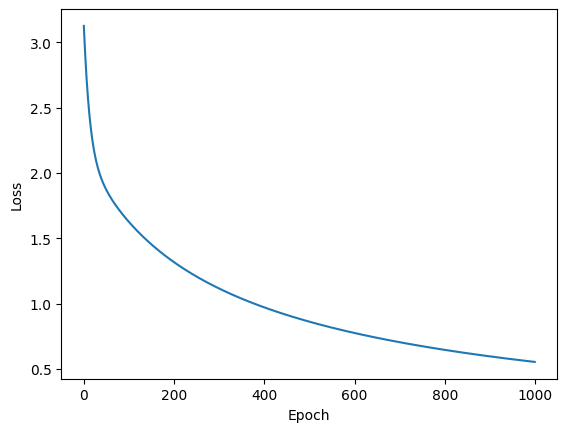

y=
 [[0.0075]
 [0.1455]
 [0.1448]
 [0.7931]] 



In [ ]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# labels (AND function)
t = np.array([[0],
              [0],
              [0],
              [1]])

#model
input_size = x.shape[1]     # the num of input column
output_size = t.shape[1]    # the num of target column
net = Model1(input_size, output_size)   # neural network model
optimizer = SGD(learning_rate = 0.1) # for update parameters

Epoch = 1000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## **Example 4.6** Implementing Model2 class (two linear layers)

In [ ]:
from collections import OrderedDict

class Model2:
    def __init__(self, input_size, hidden_size, output_size):
        #initialize weights and biases
        W1 = np.random.randn(input_size, hidden_size)  #initialize weights with random value
        b1 = np.zeros(hidden_size)  #initialize biases with 0
        W2 = np.random.randn(hidden_size, output_size)  #initialize weights with random value
        b2 = np.zeros(output_size)  #initialize biases with 0

        #neural network model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1) # Linear layer
        self.layers['sigmoid1'] = Sigmoid()     # Sigmoid layer
        self.layers['linear2'] = Linear(W2, b2) # Linear layer
        self.layers['sigmoid2'] = Sigmoid()     # Sigmoid layer
        self.loss_layer = BinaryCrossentropy()  # Binary Crossentropy layer

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # MSE layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

## **Example 4.7** Learning XOR function with Model2


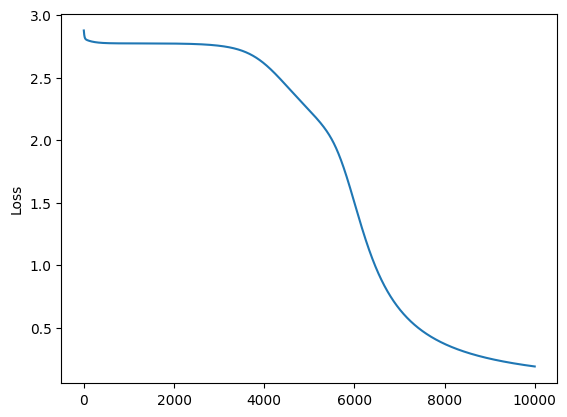

y=
 [[0.0421]
 [0.9451]
 [0.9477]
 [0.0364]] 



In [ ]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

#correct answers (labels)
t = np.array([[0],
              [1],
              [1],
              [0]])

#model
input_size = x.shape[1]
hidden_size = 2         # hyper parameter
output_size = t.shape[1]
net = Model2(input_size, hidden_size, output_size)  # neural network model
optimizer = SGD(learning_rate = 0.1)                # for update parameters

Epoch = 10000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## 🤔 **Exercise 4.3**

Construct a neural network with 2 input copy nodes, 2 hidden neurons, and 2 output neurons using Model2 class. Then learning the neural network for HA (Half adder) function based on the backpropagation algorithm. The truth table for HA is shown below. After learning, please check the loss graph, outputs, weights and biases.

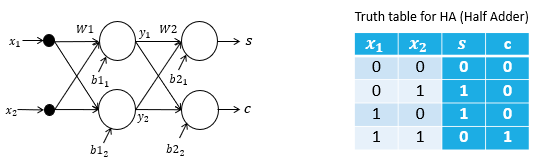

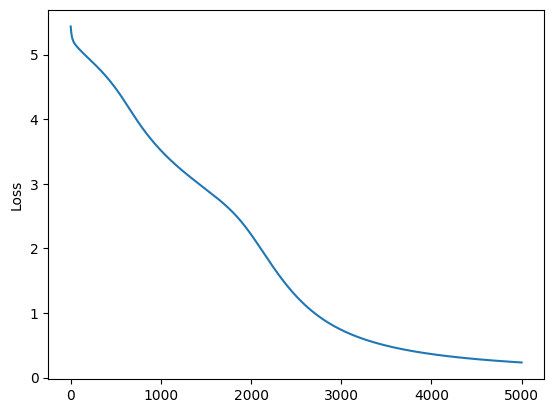

y=
 [[3.9113e-02 1.9318e-04]
 [9.5370e-01 1.7722e-02]
 [9.5375e-01 1.7748e-02]
 [3.8223e-02 9.7571e-01]] 



In [ ]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

#correct answers (labels)
t = np.array([[0, 0],
              [1, 0],
              [1, 0],
              [0, 1]])

#model
input_size = x.shape[1]
hidden_size = 2         # hyper parameter
output_size = t.shape[1]
net = Model2(input_size, hidden_size, output_size)  # neural network model
optimizer = SGD(learning_rate = 0.1)                # for update parameters

Epoch = 5000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## 🤔 **Exercise 4.4**

Construct a neural network with 3 input copy nodes, 3 hidden neurons, and 1 output neuron using Model2 class. Then learning the neural network for 3-input XOR function. The truth table for 3-input XOR is shown below. After learning, please check the loss graph, outputs, weights and biases.

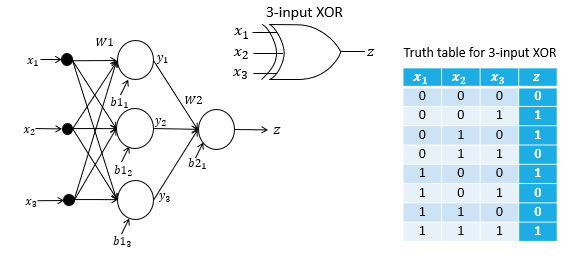

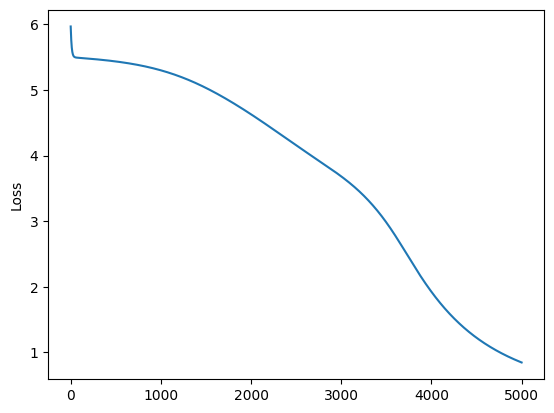

y=
 [[0.0516]
 [0.9183]
 [0.8582]
 [0.13  ]
 [0.8489]
 [0.1213]
 [0.0754]
 [0.9577]] 



In [ ]:
# inputs
x = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

#correct answers (labels)
t = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

#model
input_size = x.shape[1]
hidden_size = 3         # hyper parameter
output_size = t.shape[1]
net = Model2(input_size, hidden_size, output_size)  # neural network model
optimizer = SGD(learning_rate = 0.1)                # for update parameters

Epoch = 5000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## 🤔 **Exercise 4.5**

Create a two-category (binary) classification problem by removing one category from the Iris dataset. Make and train neural network model and find the accuracy.


In [ ]:
#import datasets
from sklearn.datasets import load_iris

iris = load_iris()  #load dataset

df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris["target"] = iris.target

df_iris = df_iris.query("target != 2")  # drop target == 2 (Iris-Virginica)
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


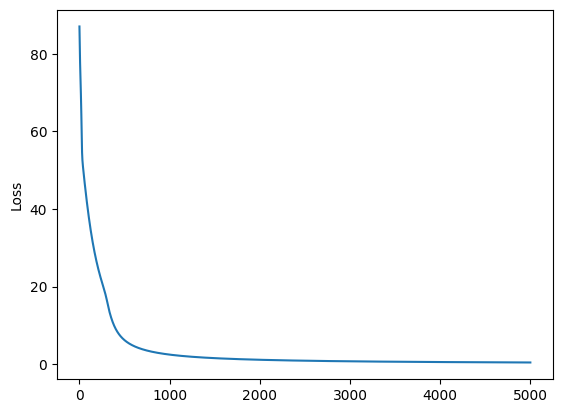


Accuracy:
1.0


In [ ]:
# inputs
x = df_iris[["sepal length (cm)",
             "sepal width (cm)",
             "petal length (cm)",
             "petal width (cm)"]].to_numpy()

# targets  (labels)
t = df_iris[["target"]].to_numpy()

#model

input_size = x.shape[1]
hidden_size = 2         # hyper parameter
output_size = t.shape[1]
net = Model2(input_size, hidden_size, output_size)  # neural network model
optimizer = SGD(learning_rate = 0.1)                # for update parameters

Epoch = 5000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

y = net.predict(x)

# calculate accuracy
prediction = y > 0.5    # if y is grater than 0.5, the prediction will be 1, otherwise 0.
accuracy = np.sum(prediction == t) / t.shape[0]

print("\nAccuracy:")
print(accuracy)

## 🤔 **Exercise 4.6 (Optional)**

Breast cancer wisconsin dataset is a binary classification problem dataset that predicts whether a person has breast cancer from 30 types of features. Make and train neural network model and find the accuracy.


In [ ]:
#import datasets
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()  #load dataset
print(cancer.DESCR)

In [ ]:
df_cancer = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df_cancer["target"] = cancer.target
display(df_cancer)

df_cancer["target"].value_counts()